# Template for Laplace Transforms

In [5]:
from sympy import symbols, Function, laplace_transform, exp
from sympy.abc import s, t

# Define the function you want to transform
f = exp(0.1*t)

# Perform Laplace transform
F_s = laplace_transform(f, t, s, noconds=True)

# Output the result
F_s


1/(s - 0.1)

# Template for Inverse Laplace Transforms

In [3]:
from sympy import symbols, inverse_laplace_transform
from sympy.abc import s, t

# Correctly defining the Laplace domain function
numerator = exp(0.1*t)
denominator = 1
F_s = numerator / denominator
# Perform inverse Laplace transform
f_t = inverse_laplace_transform(F_s, s, t)


# simplify the result

from sympy import simplify

simplify(f_t)

# Output the result
f_t

exp(0.1*t)*DiracDelta(t)

# Template for Partial Fraction Decomposition

In [18]:
from sympy import symbols, apart
from sympy.abc import s

# Define the expression you want to decompose
numerator = 6*(s+34)
denominator = s*(s**2+10*s+34)

expr = numerator / denominator

# Perform partial fraction decomposition
decomposed_expr = apart(expr)

# Output the result
decomposed_expr

[0, 0]

# Template for solving RLC circuit problems

In [11]:
from sympy import symbols, Function, laplace_transform, inverse_laplace_transform, solveset, S
from sympy.abc import s, t

# Circuit parameters (change these values as per your question)
R, L, C, V0 = 1, 1, 1, 1  # Example values

# Define symbols
I = symbols('I', cls=Function)(s)  # Laplace transform of the current

# Laplace transform of the input (change V_s as per your question)
V_s = V0 / s  # Example for a step input of magnitude V0

# Equation in the s-domain (adjust this equation based on your circuit)
equation = L*s**2*I + R*s*I + 1/C*I - V_s

# Solve for I(s)
I_s_solution = solveset(equation, I, domain=S.Complexes)

# Find voltage or current in the desired component (adjust this expression accordingly)
# Example: Voltage across the capacitor in s-domain
V_C_s = 1 / (s*C) * I_s_solution.args[0]

# Inverse Laplace transform to find the time-domain solution (adjust this as needed)
V_C_t = inverse_laplace_transform(V_C_s, s, t)

# Output the result
I_s_solution, V_C_s, V_C_t



({1.0/(s*(s**2 + s + 1))},
 1.0/(s**2*(s**2 + s + 1)),
 1.0*t*Heaviside(t) + 1.0*(-sqrt(3)*exp(-t/2)*sin(sqrt(3)*t/2)/3 + exp(-t/2)*cos(sqrt(3)*t/2))*Heaviside(t) - 1.0*Heaviside(t))

# Template for Finding Initial and Final Value Theorems


In [14]:
from sympy import symbols, Function, limit, oo, laplace_transform, inverse_laplace_transform
from sympy.abc import s, t

# Define your Laplace transform expression here
F_s = 1/(s-0.1)

# Initial Value Theorem: lim(t->0) f(t) = lim(s->oo) s*F(s)
initial_value = limit(s*F_s, s, oo)

# Final Value Theorem: lim(t->oo) f(t) = lim(s->0) s*F(s) (only if all poles of s*F(s) are in the left half-plane)
final_value = limit(s*F_s, s, 0)

initial_value, final_value


SyntaxError: invalid syntax (3653383668.py, line 5)

# Template for Pole-Zero Diagram and Stability Analysis

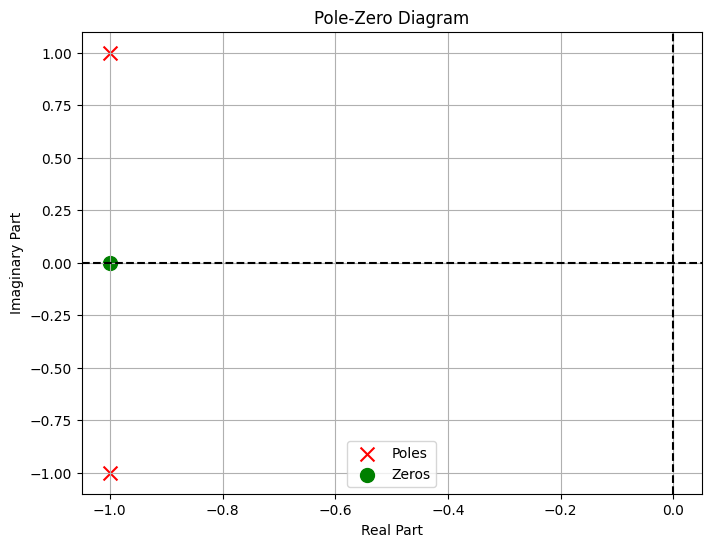

System is stable: True
Poles: [(-1.0, -1.0), (-1.0, 1.0)]
Zeros: [(-1.0, 0.0)]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, re, im, I

# Define symbolic variable
s = symbols('s')

# Example transfer function components for demonstration purposes
numerator = s + 1  # Update with your function
denominator = s**2 + 2*s + 2  # Update with your function

# Solve for poles and zeros
poles = solve(denominator, s)
zeros = solve(numerator, s)

# Function to extract real and imaginary parts safely
def get_real_imag(expr):
    # Evaluate the expression to numerical if possible, otherwise fallback to symbolic re and im
    evaluated_expr = expr.evalf()
    real_part = float(re(evaluated_expr))
    imag_part = float(im(evaluated_expr))
    return (real_part, imag_part)

# Extract real and imaginary parts for poles and zeros
pole_coordinates = [get_real_imag(pole) for pole in poles]
zero_coordinates = [get_real_imag(zero) for zero in zeros]

# Plotting logic remains the same
plt.figure(figsize=(8, 6))
if pole_coordinates:
    pole_re, pole_im = zip(*pole_coordinates)
    plt.scatter(pole_re, pole_im, marker='x', color='r', s=100, label='Poles')
if zero_coordinates:
    zero_re, zero_im = zip(*zero_coordinates)
    plt.scatter(zero_re, zero_im, marker='o', color='g', s=100, label='Zeros')
plt.axvline(x=0, color='k', linestyle='--')  # Y-axis
plt.axhline(y=0, color='k', linestyle='--')  # X-axis
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Pole-Zero Diagram')
plt.legend()
plt.grid(True)
plt.show()

# Stability check
stability = all(get_real_imag(pole)[0] < 0 for pole in poles)
print("System is stable:" if stability else "System is unstable:", stability)

# Print the poles and zeros
print("Poles:", pole_coordinates)
print("Zeros:", zero_coordinates)

# Template for Determining Steady State Gain

In [22]:
from sympy import symbols, limit

# Define your transfer function here
numerator = 1  # Example numerator
denominator = s + 1  # Example denominator
transfer_function = numerator / denominator

# Steady state gain is the limit of the transfer function as s approaches 0
steady_state_gain = limit(transfer_function, s, 0)

steady_state_gain


1

In [30]:
from sympy import symbols, laplace_transform, inverse_laplace_transform, cos, pi, limit
from sympy.abc import s, t
from sympy.functions import Heaviside

# Step 1: Laplace transform of h(t)
h_t = exp(-2*t) * Heaviside(t)
H_s = laplace_transform(h_t, t, s, noconds=True)

# Step 2: Laplace transform of x(t)
x_t = 3 * cos(4*pi*t) * Heaviside(t)
X_s = laplace_transform(x_t, t, s, noconds=True)

# Step 3: Compute Y(s) = H(s) * X(s)
Y_s = H_s * X_s

# Step 4: Inverse Laplace transform of Y(s) to get y(t)
y_t = inverse_laplace_transform(Y_s, s, t)

# Step 5: Steady State Gain of H(s)
steady_state_gain = limit(H_s, s, 0)

H_s, X_s, Y_s, y_t, steady_state_gain


(1/(s + 2),
 3/(2*(s + 4*I*pi)) + 3/(2*(s - 4*I*pi)),
 (3/(2*(s + 4*I*pi)) + 3/(2*(s - 4*I*pi)))/(s + 2),
 (6*pi*sin(4*pi*t)/(2 + 8*pi**2) + 3*cos(4*pi*t)/(2 + 8*pi**2))*Heaviside(t) - 3*exp(-t*(4 + 16*pi**2)/(2 + 8*pi**2))*Heaviside(t)/(2 + 8*pi**2),
 1/2)